# Cherry Blossoms!

If we travel back in time a few months, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were in full bloom! We don't live in Japan or DC, but we do have our fair share of the trees - buuut you sadly missed [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2019).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's a little out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [1]:
import pandas as pd
%matplotlib inline

## 1. Read in the file using pandas, and look at the first five rows

In [2]:

df = pd.read_excel("KyotoFullFlower7.xls")

df.head(5)


,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [3]:

df = pd.read_excel("KyotoFullFlower7.xls", skiprows=25)

df.head(5)


,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 3. Look at the final five rows of the data

In [4]:
df = pd.read_excel("KyotoFullFlower7.xls", skiprows=25)

df.tail(5)


,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [5]:
df = pd.read_excel("KyotoFullFlower7.xls", skiprows=25, na_values = "-")

df.head(5)


,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 4. What source is the most common as a reference?

In [6]:
df['Reference Name'].value_counts(ascending=False).head(10)

NEWS-PAPER(ARASHIYAMA)        94
SUGIURAKE-NIKKI               38
MYOHOIN-HINAMIKI              32
OYUDONONO-UENO-NIKKI          26
OYUDONONO-UENO-NIKKI [EDA]    21
DAIGOJI-ZATSUYO               21
SANETAKA-KOKI                 19
NIHONKIRYAKU                  19
(SHIRYO-SORAN)                15
KAKUMEIKI                     15
Name: Reference Name, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [7]:
df[df['Full-flowering date (DOY)'].notnull()]


,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
63,864,100.0,409.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU
65,866,106.0,416.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU
68,869,95.0,405.0,5.0,2.0,KANKE-BUNSOU
88,889,104.0,414.0,5.0,2.0,NIPPON-SANDAI-JITSUROKU
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU


## 7. Make a histogram of the full-flowering date

Is it not showing up? Remember the "magic" command that makes graphs show up in matplotlib notebooks!

In [8]:
import matplotlib

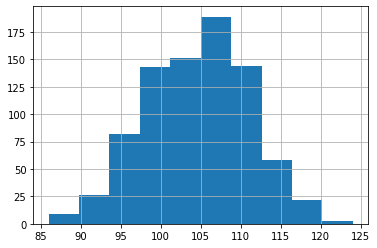

In [9]:
df['Full-flowering date (DOY)'].hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

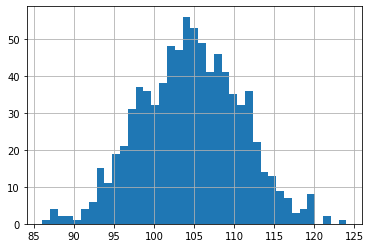

In [10]:
df['Full-flowering date (DOY)'].hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [11]:
round(df["Full-flowering date (DOY)"].mean(),2)

104.54

In [12]:
df["Full-flowering date (DOY)"].count()

827

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [13]:
round(df[df.AD < 1900]['Full-flowering date (DOY)'].mean())

105.0

## 11. How about after 1900?

In [14]:
round(df[df.AD > 1900]['Full-flowering date (DOY)'].mean())


100.0

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [15]:
df[df['Source code'] == 4].AD.count()

250

## 13. Show only the years where our data was from a title in Japanese poetry

In [16]:
df[df['Source code'] == 4].AD

149      950
178      979
184      985
188      989
218     1019
230     1031
297     1098
301     1102
303     1104
313     1114
316     1117
324     1125
325     1126
330     1131
333     1134
338     1139
340     1141
342     1143
358     1159
360     1161
362     1163
363     1164
364     1165
365     1166
366     1167
368     1169
369     1170
371     1172
372     1173
373     1174
        ... 
1129    1930
1130    1931
1131    1932
1133    1934
1136    1937
1137    1938
1138    1939
1139    1940
1140    1941
1145    1946
1146    1947
1147    1948
1148    1949
1149    1950
1150    1951
1190    1991
1191    1992
1192    1993
1193    1994
1194    1995
1195    1996
1196    1997
1197    1998
1198    1999
1199    2000
1200    2001
1201    2002
1202    2003
1203    2004
1204    2005
Name: AD, Length: 250, dtype: int64

## 14. Graph the full-flowering date (DOY) over time

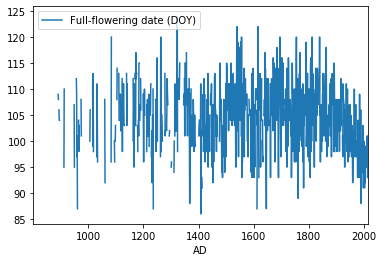

In [17]:
df.plot(y='Full-flowering date (DOY)', x='AD')

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [18]:
df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: Full-flowering date (DOY), dtype: float64

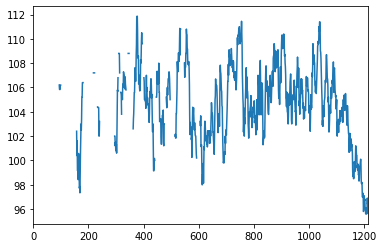

In [19]:
df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean(). \
plot(y='Full-flowering date (DOY)', x='AD')

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

In [22]:
df['rolling_date'] = df.rolling(20, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean()
df.rolling_date

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
        ...  
1185    99.65
1186    99.55
1187    99.90
1188    99.50
1189    98.55
1190    98.50
1191    98.25
1192    98.25
1193    98.25
1194    98.20
1195    98.40
1196    98.60
1197    97.95
1198    97.80
1199    97.70
1200    97.55
1201    97.45
1202    97.40
1203    96.55
1204    96.55
1205    96.35
1206    96.45
1207    95.90
1208    96.00
1209    96.35
1210    96.45
1211    96.80
1212    96.60
1213    96.35
1214    96.05
Name: rolling_date, Length: 1215, dtype: float64

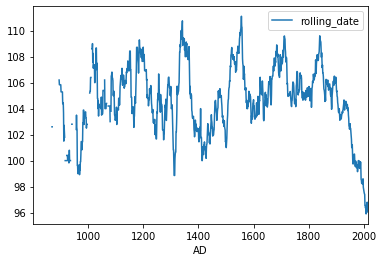

In [24]:
df.plot(x='AD', y='rolling_date').ylim=(80, 120)

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

**I've given you March as an example**, you just need to add in two more lines to do April and May.

In [46]:
df.loc[df['Full-flowering date'] < 500, 'month'] = 'March'

In [49]:
df.loc[(df['Full-flowering date'] >=400) & (df['Full-flowering date'] <=500), 'month'] = 'April'

In [47]:
df.loc[df['Full-flowering date'] >= 500, 'month'] = 'May'

### 17. Using your new column, how many blossomings happened in each month?

In [50]:
df.month.value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

### 18. Graph how many blossomings happened in each month.

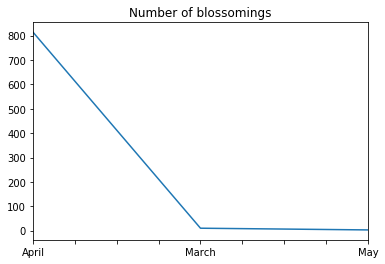

In [51]:
df.month.value_counts().plot(title="Number of blossomings")


## 19. Adding a day-of-month column

Now we're going to add a new column called "day of month." It's actually a little tougher than it should be since the `Full-flowering date` column is a *float* instead of an integer.

And if you try to convert it to an int, **pandas yells at you!**

That's because, as you can read, you can't have an `NaN` be an integer. But, for some reason, it *can* be a float. Ugh! So what we'll do is **drop all of the na values, then convert them to integers to get rid of the decimals.**

I'll show you the first 5 here.

In [52]:
df['Full-flowering date'].dropna().astype(int).head()

11    401
14    415
30    406
50    418
52    414
Name: Full-flowering date, dtype: int64

On the next line, I take the first character of the row and add a bunch of exclamation points on it. I want you to edit this code to **return the last TWO digits of the number**. This only shows you the first 5, by the way.

You might want to look up 'list slicing.'

In [53]:
df['Full-flowering date'].dropna().astype(int).astype(str).apply(lambda value: value[-2:])

11      01
14      15
30      06
50      18
52      14
63      09
65      16
68      05
88      14
90      19
91      17
93      16
94      14
95      13
101     12
107     07
111     04
112     20
116     05
122     14
125     08
129     07
132     16
140     19
148     17
149     05
154     30
156     22
157     19
158     07
        ..
1185    12
1186    05
1187    15
1188    03
1189    29
1190    07
1191    03
1192    07
1193    09
1194    09
1195    12
1196    07
1197    01
1198    04
1199    09
1200    06
1201    01
1202    08
1203    01
1204    09
1205    08
1206    07
1207    04
1208    05
1209    05
1210    09
1211    10
1212    03
1213    04
1214    03
Name: Full-flowering date, Length: 827, dtype: object

Now that you've successfully extracted the last two letters, save them into a new column called `'day-of-month'`

In [58]:
df['day_of_month'] = df['Full-flowering date'].dropna().astype(int).astype(str).apply(lambda value: value[-2:])

In [59]:
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,rolling_date,month,day-of-month,day_of_month
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.45,April,09,09
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.80,April,10,10
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.60,April,03,03
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.35,April,04,04
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.05,April,03,03


### 20. Adding a date column

Now take the `'month'` and `'day-of-month'` columns and combine them in order to create a new column called `'date'`

In [60]:
df['date'] = df['day_of_month'] + df['month']
df['date']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11      01April
12          NaN
13          NaN
14      15April
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
         ...   
1185    12April
1186    05April
1187    15April
1188    03April
1189    29March
1190    07April
1191    03April
1192    07April
1193    09April
1194    09April
1195    12April
1196    07April
1197    01April
1198    04April
1199    09April
1200    06April
1201    01April
1202    08April
1203    01April
1204    09April
1205    08April
1206    07April
1207    04April
1208    05April
1209    05April
1210    09April
1211    10April
1212    03April
1213    04April
1214    03April
Name: date, Length: 1215

# YOU ARE DONE.

And **incredible.**